# Capstone #1: Portfolio Profiling

## Author: Zeliha Ural Merpez
## Date: 2025-01-14

## M2M Tech

### Project Description:

I developed a stock analysis tool that integrates financial metrics and interactive visualizations:

- **Data Collection**: I implemented functionality to download stock data and financial metrics for specified tickers using 'yfinance' and calculate yearly Sharpe ratios.

- **Cumulative Returns**: I designed a feature to calculate and visualize cumulative returns with interactive Plotly graphs.

- **Candlestick Chart**: I created an interactive candlestick chart for each ticker, with customizable time intervals.

- **Sharpe Ratio Heatmap**: I developed a heatmap for EDA and performed statistical analysis of Sharpe ratios across various tickers and years.

- **Data Preprocessing**: I incorporated data handling techniques, including NaN management, Min-Max scaling, and the calculation of a decision score for each ticker based on value, growth, and profitability metrics.

- **Investment Visualization**: I designed an interactive investment donut chart to assist in portfolio decision-making, based on the calculated decision score.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Function to download stock data and value, growth & profitability metrics
def download_stock_data(tickers, interval='1d', start_date='2000-01-01', end_date='2025-01-01'):
    stock_data = []
    stock_metrics = {}
    sharpe_df = []
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")

        # Download historical stock data
        data = yf.download(ticker, interval=interval, start=start_date, end=end_date)
        if data.empty:
            print(f"No data found for {ticker}. Skipping...")
            continue
        tic_df = data
        tic_df.columns = [x[0] for x in tic_df.columns]
        tic_df['Ticker'] = ticker
        tic_df.reset_index(inplace=True)

        # Adjust interval 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
        tic_df[interval + '_return'] = tic_df['Close'].pct_change()
        stock_data.append(tic_df)

        # Get metrics
        firm = yf.Ticker(ticker)
        info = firm.info

        stock_metrics[ticker] = {
            'P/E Ratio': info.get('trailingPE', 'N/A'), # value metrics
            'P/B Ratio': info.get('priceToBook', 'N/A'),
            'Dividend Yield': info.get('dividendYield', 'N/A'),
            'Revenue Growth': info.get('revenueGrowth', 'N/A'), # growth metrics
            'EPS Growth': info.get('earningsQuarterlyGrowth', 'N/A'),
            'ROE': info.get('returnOnEquity', 'N/A'), # profitability
            'ROA': info.get('returnOnAssets', 'N/A'),
            'Operating Margin': info.get('operatingMargins', 'N/A'),
            'Net Profit Margin': info.get('profitMargins', 'N/A')
        }

        # Calculate Sharpe ratio
        sharpe_df.append(calculate_sharpe_ratio(tic_df, ticker))

    return pd.concat(stock_data), pd.DataFrame(stock_metrics).T.reset_index().rename(columns={'index': 'Ticker'}), pd.concat(sharpe_df)

# Interpretation:
**Higher Sharpe Ratio:** A higher Sharpe ratio indicates that the investment or portfolio is providing better returns for the same amount of risk, which is generally preferred by investors.

**Lower Sharpe Ratio:** A lower Sharpe ratio suggests that the investment is providing poor returns relative to the risk taken.

**Negative Sharpe Ratio:** A negative Sharpe ratio indicates that the asset's returns are worse than the risk-free rate, meaning the investor would have been better off investing in a risk-free asset.

In [ ]:
def calculate_sharpe_ratio(df, ticker, risk_free_rate=0.02):
    # Calculate daily returns
    df['Daily Return'] = df['Close'].pct_change()
    df.dropna(subset=['Daily Return'], inplace=True)
    df.set_index('Date', inplace=True)

    yearly_data = df.resample('YE').agg({'Daily Return': ['mean', 'std', 'sum', 'count']})

    # Calculate the yearly Sharpe ratio
    sharpe_ratios = []

    for year in yearly_data.index:
        # Extract yearly data
        avg_daily_return = yearly_data.loc[year, ('Daily Return', 'mean')]
        daily_volatility = yearly_data.loc[year, ('Daily Return', 'std')]
        annualized_return = yearly_data.loc[year, ('Daily Return', 'sum')]
        annualized_volatility = daily_volatility * np.sqrt(yearly_data.loc[year, ('Daily Return', 'count')])

        # Calculate the Sharpe ratio
        sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
        sharpe_ratios.append(sharpe_ratio)

    # Create a DataFrame with results
    sharpe_df = pd.DataFrame({
        'Ticker': ticker,
        'Year': yearly_data.index.year,
        'Sharpe Ratio': sharpe_ratios
    })
    return sharpe_df

- Value metrics help you assess if a stock is cheap or expensive.
- Growth metrics help you evaluate a firm's potential to expand its earnings and revenue.
- Profitability metrics measure how efficiently a company is generating profit.

In [ ]:
symbols = ['AMT', 'ORCL', 'MSFT', 'AMX', 'AAPL', 'GOOGL', 'AMZN', 'BA', 'EXPE', 'EA']
stock_data, stock_metrics, sharpe_df = download_stock_data(symbols)


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


In [ ]:
display(stock_data)

Close        High         Low        Open   Volume Ticker  \
Date                                                                         
2000-01-04   21.948334   22.799778   21.759124   21.948334   522300    AMT   
2000-01-05   22.610565   22.610565   21.617214   21.948331   674000    AMT   
2000-01-06   22.374054   22.610566   21.759122   22.279449   911700    AMT   
2000-01-07   23.603916   23.651219   22.326750   22.515960   606000    AMT   
2000-01-10   25.685219   25.827126   24.218844   24.218844  1012300    AMT   
...                ...         ...         ...         ...      ...    ...   
2024-12-24  149.179993  149.649994  147.009995  147.410004   778600     EA   
2024-12-26  149.070007  149.490005  147.949997  148.339996   883400     EA   
2024-12-27  148.119995  148.850006  147.029999  148.460007  1023500     EA   
2024-12-30  146.539993  147.490005  145.059998  147.149994  1152600     EA   
2024-12-31  146.300003  147.100006  145.729996  146.270004   918400     EA   

            1d_return  Daily Return  
Date                                 
2000-01-04  -0.010661     -0.010661  
2000-01-05   0.030172      0.030172  
2000-01-06  -0.010460     -0.010460  
2000-01-07   0.054968      0.054968  
2000-01-10   0.088176      0.088176  
...               ...           ...  
2024-12-24   0.012763      0.012763  
2024-12-26  -0.000737     -0.000737  
2024-12-27  -0.006373     -0.006373  
2024-12-30  -0.010667     -0.010667  
2024-12-31  -0.001638     -0.001638  

[60044 rows x 8 columns]

 **Calculate Cumulative Returns**: Cumulative returns are the product of each period's (daily) returns, starting from an initial value of 1. We can compute the cumulative return as follows:

$$
   \text{Cumulative Return} = \prod_{i=1}^{n} (1 + \text{Daily Return}_i)
$$



In [ ]:
def get_cumulative_return_plt(df, ticker):
  data = df[df['Ticker'] == ticker].copy()
  # Calculate cumulative returns
  data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

  # Plot the cumulative return
  plt.figure(figsize=(10, 6))
  plt.plot(data.index, data['Cumulative Return'], label='Cumulative Return', color="#348dc1")

  # Customize the plot
  plt.title('Ticker: ' + ticker, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Cumulative Return', fontweight='bold')
  plt.grid(True)

  # Show the plot
  plt.tight_layout()
  plt.show()

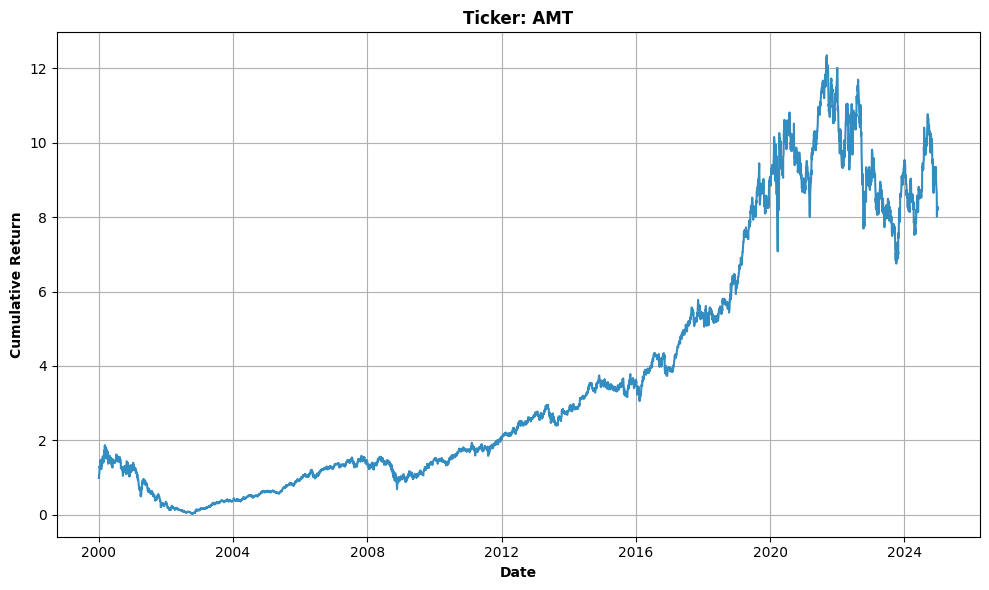

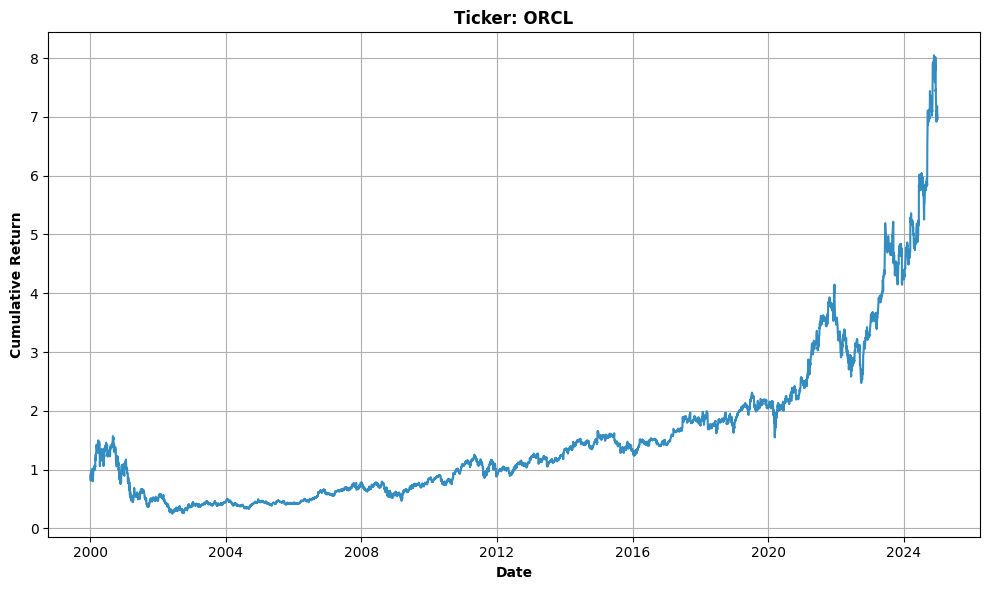

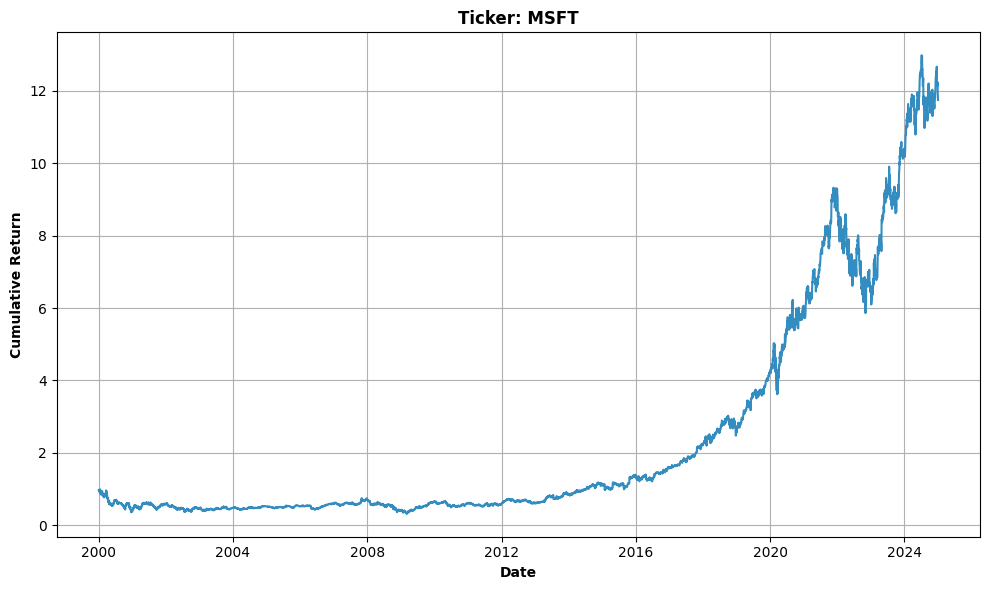

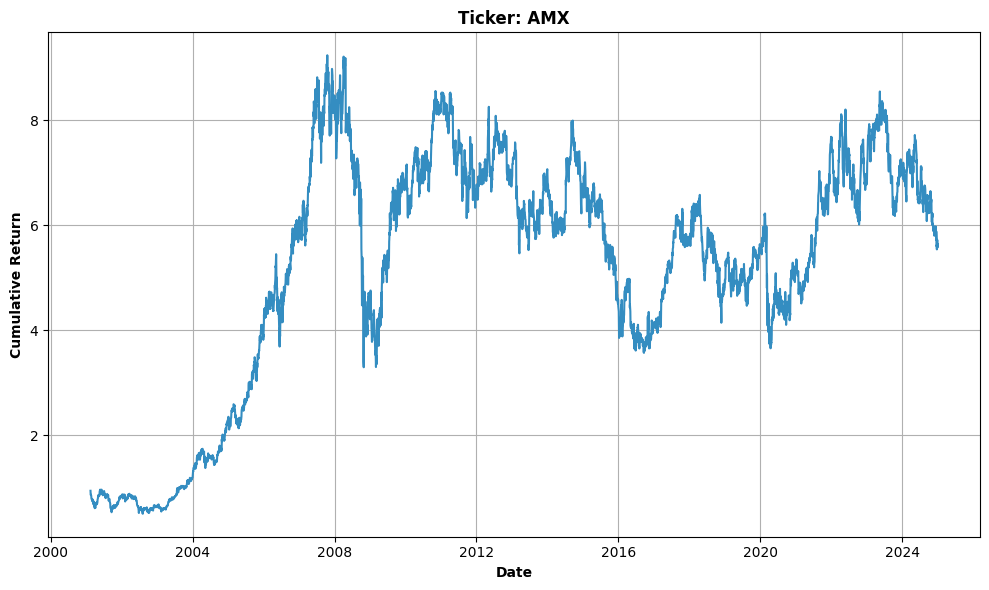

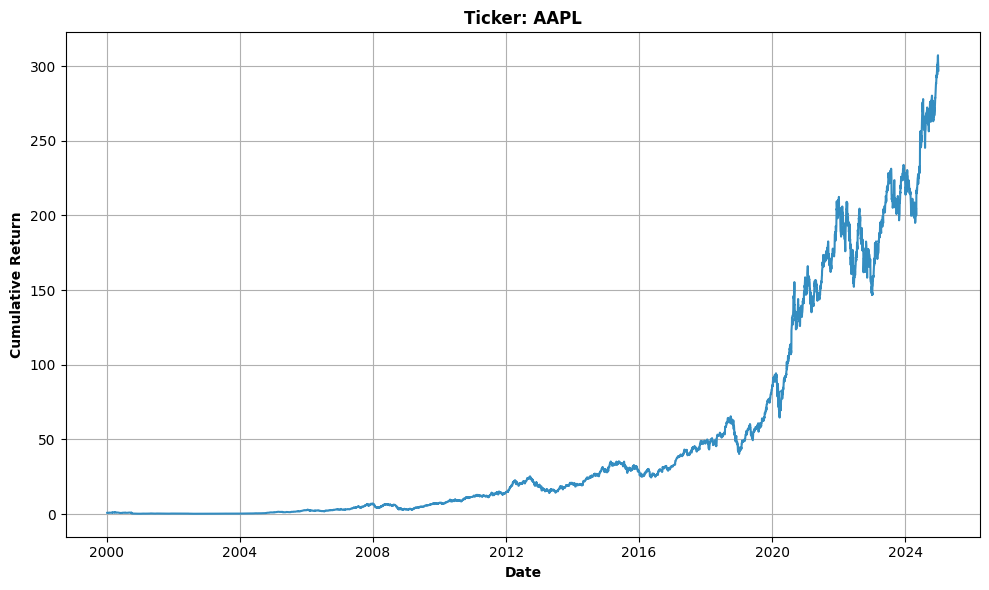

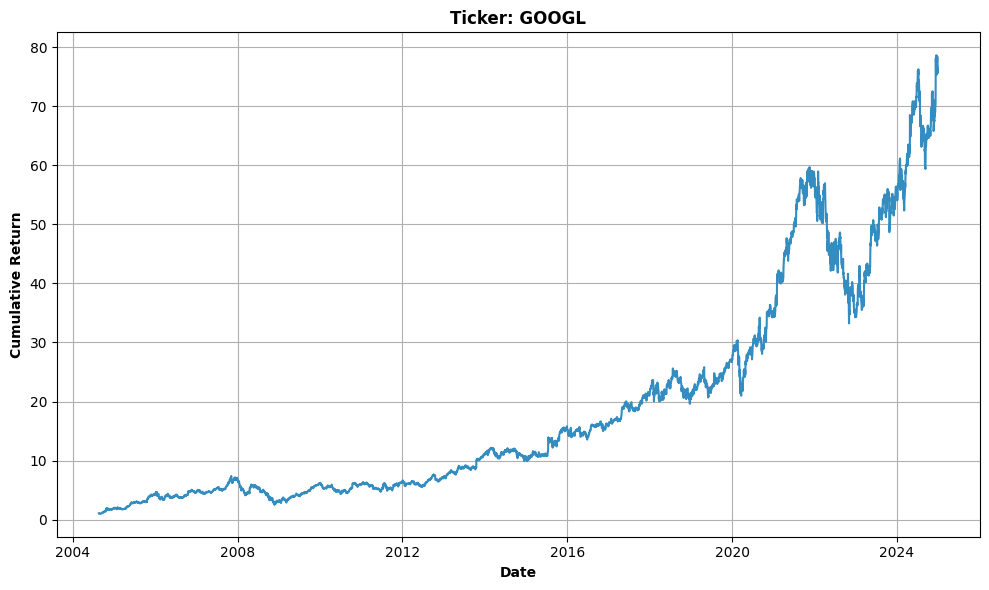

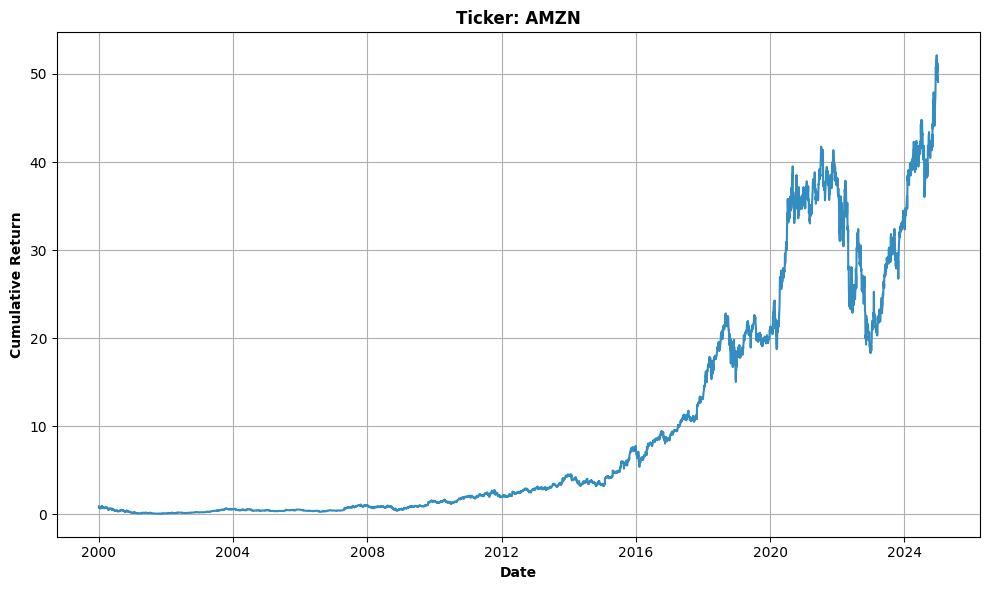

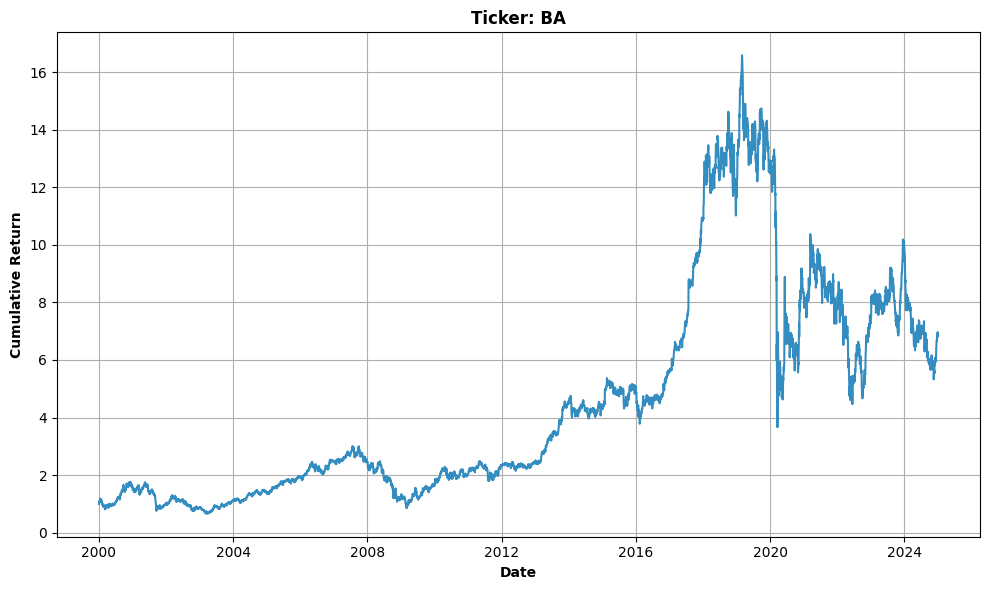

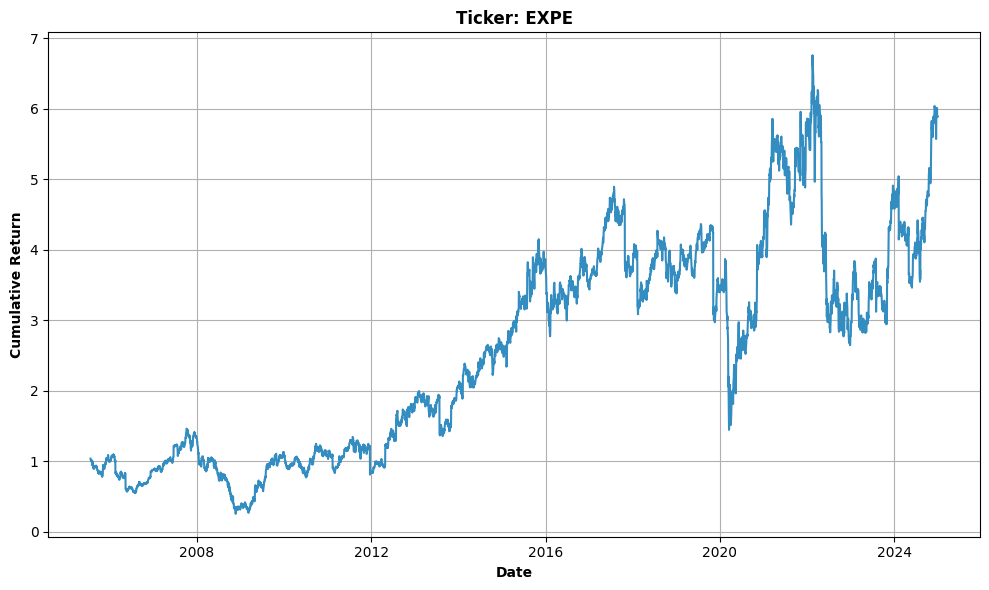

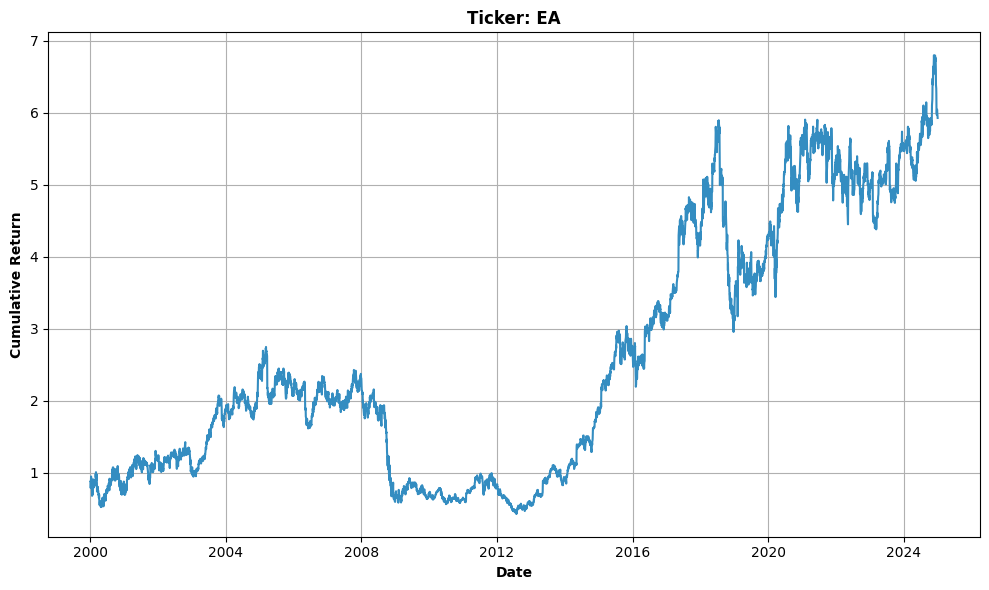

In [ ]:
for symbol in symbols:
  get_cumulative_return_plt(stock_data, symbol)

In [ ]:
# Create a base figure with an empty candlestick trace
fig = go.Figure()

# Add initial trace (for the first symbol)
initial_symbol = symbols[0]
filtered_data = stock_data[stock_data['Ticker'] == initial_symbol].copy()
filtered_data.reset_index(inplace=True)
fig.add_trace(go.Candlestick(
    x=filtered_data['Date'],
    open=filtered_data['Open'],
    high=filtered_data['High'],
    low=filtered_data['Low'],
    close=filtered_data['Close'],
    name=initial_symbol
))

# Update layout with dropdown
fig.update_layout(
    title=f'Stock History for {initial_symbol}',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    updatemenus=[
        {
            'buttons': [
                {
                    'method': 'update',
                    'label': symbol,
                    'args': [{
                        'x': [stock_data[stock_data['Ticker'] == symbol].index],
                        'open': [stock_data[stock_data['Ticker'] == symbol]['Open']],
                        'high': [stock_data[stock_data['Ticker'] == symbol]['High']],
                        'low': [stock_data[stock_data['Ticker'] == symbol]['Low']],
                        'close': [stock_data[stock_data['Ticker'] == symbol]['Close']]
                    }],
                    'args2': [{
                        'title': f'Candlestick Chart for {symbol}'
                    }]
                } for symbol in symbols
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Show the figure
fig.show()

# Save the figure as an HTML file
fig.write_html('interactive_candlestick_chart.html')

In [ ]:
stock_data_new = stock_data[stock_data.index > '2020-01-01']
# Create a base figure with an empty candlestick trace
fig = go.Figure()

# Add initial trace (for the first symbol)
initial_symbol = symbols[0]
filtered_data = stock_data_new[stock_data_new['Ticker'] == initial_symbol].copy()
filtered_data.reset_index(inplace=True)
fig.add_trace(go.Candlestick(
    x=filtered_data['Date'],
    open=filtered_data['Open'],
    high=filtered_data['High'],
    low=filtered_data['Low'],
    close=filtered_data['Close'],
    name=initial_symbol
))

# Update layout with dropdown
fig.update_layout(
    title=f'Stock History for {initial_symbol}',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    updatemenus=[
        {
            'buttons': [
                {
                    'method': 'update',
                    'label': symbol,
                    'args': [{
                        'x': [stock_data_new[stock_data_new['Ticker'] == symbol].index],
                        'open': [stock_data_new[stock_data_new['Ticker'] == symbol]['Open']],
                        'high': [stock_data_new[stock_data_new['Ticker'] == symbol]['High']],
                        'low': [stock_data_new[stock_data_new['Ticker'] == symbol]['Low']],
                        'close': [stock_data_new[stock_data_new['Ticker'] == symbol]['Close']]
                    }],
                    'args2': [{
                        'title': f'Candlestick Chart for {symbol}'
                    }]
                } for symbol in symbols
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Show the figure
fig.show()

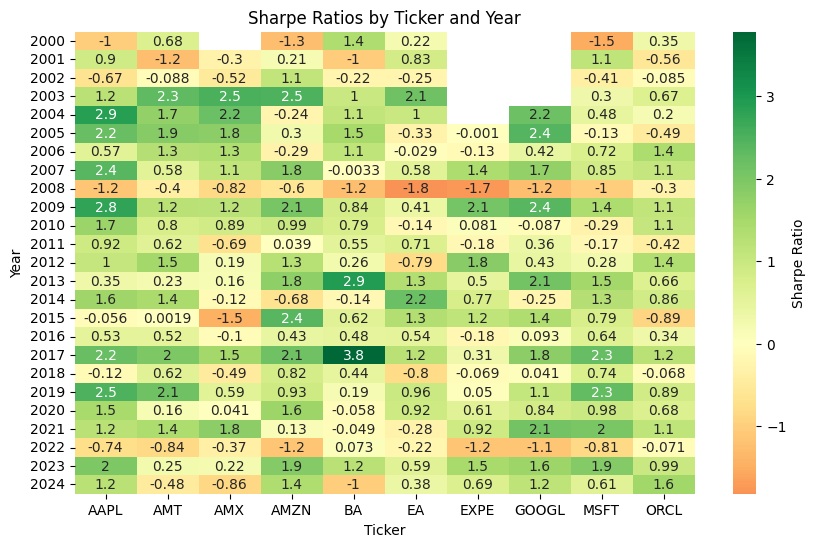

In [ ]:
heatmap_data = sharpe_df.pivot(index='Year', columns='Ticker', values='Sharpe Ratio')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='RdYlGn', annot=True, center=0, cbar_kws={'label': 'Sharpe Ratio'})

# Display the heatmap
plt.title('Sharpe Ratios by Ticker and Year')
plt.show()


In [ ]:
df = sharpe_df.copy()
df['Ticker'] = df['Ticker'].astype('category')
df['Year'] = df['Year'].astype('category')
df['sharpe'] = df['Sharpe Ratio']

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Fit mixed-effects model: score ~ ticker + year with random intercept for ticker
model = smf.mixedlm('sharpe ~ C(Ticker) + C(Year)', data=df, groups=df['Ticker'])
result = model.fit()

# Manually adding significance stars based on p-values
def significance_stars(p_value):
    if p_value=='':
      return ''
    p_value = float(p_value)
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return ''

# Extract summary results into a dataframe
summary_df = result.summary().tables[1]

# Add the significance stars
summary_df['Significance'] = summary_df['P>|z|'].apply(significance_stars)

# Reorder columns to place 'Significance' last
summary_df = summary_df[['Coef.', 'Std.Err.', 'z', 'P>|z|', 'Significance']]

# Print the adjusted summary with significance stars
print("\nAnnotated Summary with Significance Stars:")
print(summary_df)


Annotated Summary with Significance Stars:
                     Coef.      Std.Err.       z  P>|z| Significance
Intercept            0.195         0.853   0.228  0.820             
C(Ticker)[T.AMT]    -0.303         1.134  -0.267  0.789             
C(Ticker)[T.AMX]    -0.657         1.134  -0.580  0.562             
C(Ticker)[T.AMZN]   -0.250         1.134  -0.220  0.826             
C(Ticker)[T.BA]     -0.455         1.134  -0.401  0.688             
C(Ticker)[T.EA]     -0.605         1.134  -0.534  0.593             
C(Ticker)[T.EXPE]   -0.648         1.137  -0.570  0.569             
C(Ticker)[T.GOOGL]  -0.168         1.136  -0.148  0.882             
C(Ticker)[T.MSFT]   -0.400         1.134  -0.353  0.724             
C(Ticker)[T.ORCL]   -0.526         1.134  -0.464  0.643             
C(Year)[T.2001]      0.197         0.407   0.484  0.628             
C(Year)[T.2002]      0.060         0.407   0.147  0.883             
C(Year)[T.2003]      1.784         0.407   4.379  0.000    

In [ ]:
stock_metrics

Ticker  P/E Ratio  P/B Ratio Dividend Yield Revenue Growth EPS Growth  \
0    AMT  43.084335  22.943666         0.0362            N/A        N/A   
1   ORCL   38.12439   49.48085         0.0083          0.069       0.21   
2   MSFT  34.352894   10.74277          0.008           0.16      0.107   
3    AMX  24.034483   2.070707         0.0363          0.096      2.168   
4   AAPL  38.305416  61.927265         0.0043          0.061     -0.358   
5  GOOGL   25.12053   7.404833         0.0042          0.151      0.336   
6   AMZN  46.529915   8.832285            N/A           0.11      0.552   
7     BA        N/A        N/A            N/A         -0.015        N/A   
8   EXPE  23.821846  17.853037            N/A          0.033      0.609   
9     EA  36.346153   5.035345         0.0054          0.058     -0.263   

       ROE      ROA Operating Margin Net Profit Margin  
0  0.17691  0.04454          0.45165           0.09942  
1  1.55578  0.07291          0.30518           0.20396  
2  0.35604  0.14592          0.46584           0.35608  
3  0.09131  0.05805          0.21231           0.04429  
4  1.57413  0.21464          0.31171           0.23971  
5  0.32101  0.16483          0.32312           0.27738  
6  0.22558  0.07069          0.10959           0.08042  
7      N/A -0.02665         -0.31418          -0.10881  
8  0.38565  0.04159          0.21182           0.07966  
9  0.13962  0.07274          0.21481           0.14118

In [ ]:
# N/A issue which are string
stock_metrics.replace('N/A', np.nan, inplace=True)

# Replace NaN with means
numerical_columns = list(stock_metrics.columns)[1:]
for col in numerical_columns:
    stock_metrics[col].fillna(stock_metrics[col].mean(), inplace=True)

# Normalize all numerical columns
from sklearn.preprocessing import MinMaxScaler

# Fit and transform the numerical columns
scaler = MinMaxScaler()
stock_metrics[numerical_columns] = scaler.fit_transform(stock_metrics[numerical_columns])
stock_metrics


Ticker  P/E Ratio  P/B Ratio  Dividend Yield  Revenue Growth  EPS Growth  \
0    AMT   0.848266   0.348716        0.996885        0.544762    0.308046   
1   ORCL   0.629844   0.792063        0.127726        0.480000    0.224861   
2   MSFT   0.463758   0.144881        0.118380        1.000000    0.184086   
3    AMX   0.009364   0.000000        1.000000        0.634286    1.000000   
4   AAPL   0.637816   1.000000        0.003115        0.434286    0.000000   
5  GOOGL   0.057190   0.089115        0.000000        0.948571    0.274743   
6   AMZN   1.000000   0.112963        0.326213        0.714286    0.360253   
7     BA   0.466419   0.311215        0.326213        0.000000    0.308046   
8   EXPE   0.000000   0.263669        0.326213        0.274286    0.382819   
9     EA   0.551536   0.049529        0.037383        0.417143    0.037609   

        ROE       ROA  Operating Margin  Net Profit Margin  
0  0.057728  0.295039          0.981808           0.447912  
1  0.987625  0.412616          0.794031           0.672783  
2  0.178531  0.715197          1.000000           1.000000  
3  0.000000  0.351030          0.674970           0.329325  
4  1.000000  1.000000          0.802403           0.749683  
5  0.154908  0.793568          0.817030           0.830713  
6  0.090550  0.403415          0.543281           0.407042  
7  0.300047  0.000000          0.000000           0.000000  
8  0.198500  0.282813          0.674342           0.405408  
9  0.032580  0.411911          0.678175           0.537740

### Summary Table:

| **Portfolio Type**          | **Key Metrics**                          | **Weights**                                |
|-----------------------------|------------------------------------------|--------------------------------------------|
| **Growth-Oriented**          | EPS Growth, Revenue Growth              | 0.5 EPS Growth, 0.5 Revenue Growth        |
| **Value-Oriented**           | P/E, P/B, ROE                           | -0.3 P/E, -0.3 P/B, 0.4 ROE                 |
| **Income-Oriented**          | Dividend Yield, Net Profit Margin, Operating Margin | 0.4 Dividend Yield, 0.3 Net Profit Margin, 0.3 Operating Margin |
| **Efficiency-Oriented**      | ROA, ROE, Operating Margin              | 0.3 ROA, 0.4 ROE, 0.3 Operating Margin    |
| **Balanced**                 | P/E, P/B, Dividend Yield, EPS Growth, Operating Margin | -0.2 P/E, -0.2 P/B, 0.2 Dividend Yield, 0.2 EPS Growth, 0.2 Operating Margin |

Each portfolio represents a different style of investing:
- **Growth-Oriented** focuses on fast-growing companies.
- **Value-Oriented** seeks undervalued companies based on financial ratios.
- **Income-Oriented** looks for high dividend-paying and stable companies.
- **Efficiency-Oriented** focuses on profitability and efficient use of assets and equity.
- **Balanced** is a well-diversified portfolio that seeks a mix of growth, value, income, and efficiency.


In [ ]:
# Key Performance Metrics

# Lower is better P/E, P/B
# Higher is better Dividend Yield, Growth, ROE, ROA, Margin
stock_metrics['decision_score'] = stock_metrics[numerical_columns].apply(lambda x: -x[0]-x[1] + sum(x[2:]), axis=1)
stock_metrics.sort_values(by='decision_score', ascending=False, inplace=True)
stock_metrics[['Ticker', 'decision_score']]


Ticker  decision_score
3    AMX        3.980247
5  GOOGL        3.673227
2   MSFT        3.587556
0    AMT        2.435198
4   AAPL        2.351670
8   EXPE        2.280711
1   ORCL        2.277735
6   AMZN        1.732078
9     EA        1.551476
7     BA        0.156671

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Function to generate an interactive donut chart
def create_interactive_donut(values, labels, title="Interactive Portfolio"):
    fig = go.Figure(data=[go.Pie(
        labels=labels,
        values=values,
        hole=0.4,  # Hole size for the donut
        hoverinfo="label+percent",  # Information displayed on hover
        textinfo="percent",  # Show percentage on the chart
    )])

    fig.update_layout(
        title=title,
        showlegend=True
    )

    # Show the interactive chart
    fig.show()

# Function to calculate donut chart values for 10 different sets of parameter toggles
def generate_interactive_donuts():
    # Labels for the 5 parameters
    labels = list(stock_metrics['Ticker'])
    values = (stock_metrics['decision_score'])
    values /= values.sum()  # Normalize the values

    create_interactive_donut(values, labels, title="Investment Portfolio Allocation for Selected Tickers")

# Generate interactive donut charts for 10 different variables
generate_interactive_donuts()


# Thank you!